In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [3]:
data= pd.read_excel("C:/Users/User/Downloads/project 2.xlsx")

In [4]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Bengaluru,2019-01-01,61.55,107.76,14.75,38.19,41.30,17.97,0.98,8.29,56.91,0.33,1.24,NaN,128,Moderate
1,Bengaluru,2019-01-02,47.27,92.47,12.94,39.73,41.65,20.45,1.06,10.22,51.25,0.32,1.25,NaN,103,Moderate
2,Bengaluru,2019-01-03,48.86,96.42,16.74,46.55,51.87,29.72,1.01,8.15,46.40,0.40,1.66,NaN,101,Moderate
3,Bengaluru,2019-01-04,51.35,105.52,17.37,45.87,50.21,24.95,1.09,5.76,41.42,0.53,1.66,NaN,106,Moderate
4,Bengaluru,2019-01-05,46.57,99.10,15.87,41.74,44.40,18.17,1.03,6.13,50.61,0.39,1.22,NaN,104,Moderate


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644 entries, 0 to 1643
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        1644 non-null   object        
 1   Date        1644 non-null   datetime64[ns]
 2   PM2.5       1644 non-null   float64       
 3   PM10        1398 non-null   float64       
 4   NO          1644 non-null   float64       
 5   NO2         1644 non-null   float64       
 6   NOx         1644 non-null   float64       
 7   NH3         1633 non-null   float64       
 8   CO          1644 non-null   float64       
 9   SO2         1644 non-null   float64       
 10  O3          1644 non-null   float64       
 11  Benzene     1644 non-null   float64       
 12  Toluene     1644 non-null   float64       
 13  Xylene      548 non-null    float64       
 14  AQI         1644 non-null   int64         
 15  AQI_Bucket  1644 non-null   object        
dtypes: datetime64[ns](1), fl

In [6]:
data.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,1644,1644.000000,1398.000000,1644.000000,1644.000000,1644.000000,1633.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,548.000000,1644.000000
mean,2019-10-01 12:00:00,37.417403,76.134607,7.677956,23.141734,22.702731,23.320778,0.758680,7.036569,34.461551,0.898984,4.971052,1.495219,90.566910
min,2019-01-01 00:00:00,6.240000,0.210000,1.460000,3.730000,4.340000,1.330000,0.250000,2.470000,6.920000,0.000000,0.000000,0.000000,29.000000
25%,2019-05-17 18:00:00,23.037500,47.922500,4.990000,13.960000,16.230000,12.130000,0.580000,5.090000,24.317500,0.190000,0.850000,0.157500,67.000000
50%,2019-10-01 12:00:00,34.315000,69.395000,6.820000,21.400000,21.380000,15.540000,0.760000,6.190000,32.600000,0.540000,2.090000,0.540000,84.000000
75%,2020-02-15 06:00:00,47.317500,98.522500,9.252500,29.932500,27.520000,25.790000,0.940000,7.582500,42.845000,1.110000,5.160000,1.622500,108.000000
max,2020-07-01 00:00:00,199.980000,346.730000,56.450000,71.550000,71.780000,207.140000,1.480000,30.020000,82.310000,29.020000,58.970000,19.000000,306.000000
std,NaN,19.859645,38.585932,4.549245,11.048689,9.238936,21.448280,0.237653,3.359832,13.555023,1.379314,7.874265,2.595353,33.383126


In [7]:
data.isna().any()

City          False
Date          False
PM2.5         False
PM10           True
NO            False
NO2           False
NOx           False
NH3            True
CO            False
SO2           False
O3            False
Benzene       False
Toluene       False
Xylene         True
AQI           False
AQI_Bucket    False
dtype: bool

In [8]:
data.shape

(1644, 16)

In [9]:
data.drop("NH3",axis=1,inplace=True)

In [10]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Bengaluru,2019-01-01,61.55,107.76,14.75,38.19,41.30,0.98,8.29,56.91,0.33,1.24,NaN,128,Moderate
1,Bengaluru,2019-01-02,47.27,92.47,12.94,39.73,41.65,1.06,10.22,51.25,0.32,1.25,NaN,103,Moderate
2,Bengaluru,2019-01-03,48.86,96.42,16.74,46.55,51.87,1.01,8.15,46.40,0.40,1.66,NaN,101,Moderate
3,Bengaluru,2019-01-04,51.35,105.52,17.37,45.87,50.21,1.09,5.76,41.42,0.53,1.66,NaN,106,Moderate
4,Bengaluru,2019-01-05,46.57,99.10,15.87,41.74,44.40,1.03,6.13,50.61,0.39,1.22,NaN,104,Moderate


In [11]:
data.drop(["Date","Xylene","AQI_Bucket","NO","NOx","Toluene"],axis=1,inplace=True)

In [12]:
data.head()

,City,PM2.5,PM10,NO2,CO,SO2,O3,Benzene,AQI
0,Bengaluru,61.55,107.76,38.19,0.98,8.29,56.91,0.33,128
1,Bengaluru,47.27,92.47,39.73,1.06,10.22,51.25,0.32,103
2,Bengaluru,48.86,96.42,46.55,1.01,8.15,46.40,0.40,101
3,Bengaluru,51.35,105.52,45.87,1.09,5.76,41.42,0.53,106
4,Bengaluru,46.57,99.10,41.74,1.03,6.13,50.61,0.39,104


In [13]:
data[data["PM10"].isnull()]

,City,PM2.5,PM10,NO2,CO,SO2,O3,Benzene,AQI
548,Chennai,122.43,NaN,13.22,0.86,18.33,56.82,0.16,212
549,Chennai,54.14,NaN,13.90,1.00,14.34,36.38,0.06,158
550,Chennai,97.13,NaN,14.86,0.99,15.54,42.23,0.18,167
551,Chennai,74.64,NaN,14.64,0.90,15.84,47.31,0.13,192
552,Chennai,74.23,NaN,13.88,0.98,11.74,48.85,0.03,116
...,...,...,...,...,...,...,...,...,...
1057,Chennai,22.78,NaN,9.37,1.12,6.79,49.94,0.15,81
1061,Chennai,31.03,NaN,10.58,1.12,6.10,38.64,0.12,79
1062,Chennai,38.30,NaN,13.54,1.11,6.54,57.60,0.12,112
1063,Chennai,33.99,NaN,9.69,0.94,5.44,62.00,0.10,105


In [14]:
data.notnull()

,City,PM2.5,PM10,NO2,CO,SO2,O3,Benzene,AQI
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
1639,True,True,True,True,True,True,True,True,True
1640,True,True,True,True,True,True,True,True,True
1641,True,True,True,True,True,True,True,True,True
1642,True,True,True,True,True,True,True,True,True


In [15]:
data=data.replace(to_replace=np.nan,value=76.134607)

In [16]:
data.isna().any()

City       False
PM2.5      False
PM10       False
NO2        False
CO         False
SO2        False
O3         False
Benzene    False
AQI        False
dtype: bool

In [17]:
data.isnull()

,City,PM2.5,PM10,NO2,CO,SO2,O3,Benzene,AQI
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1639,False,False,False,False,False,False,False,False,False
1640,False,False,False,False,False,False,False,False,False
1641,False,False,False,False,False,False,False,False,False
1642,False,False,False,False,False,False,False,False,False


In [18]:
data.isnull().sum()

City       0
PM2.5      0
PM10       0
NO2        0
CO         0
SO2        0
O3         0
Benzene    0
AQI        0
dtype: int64

In [19]:
import matplotlib.pyplot as plt

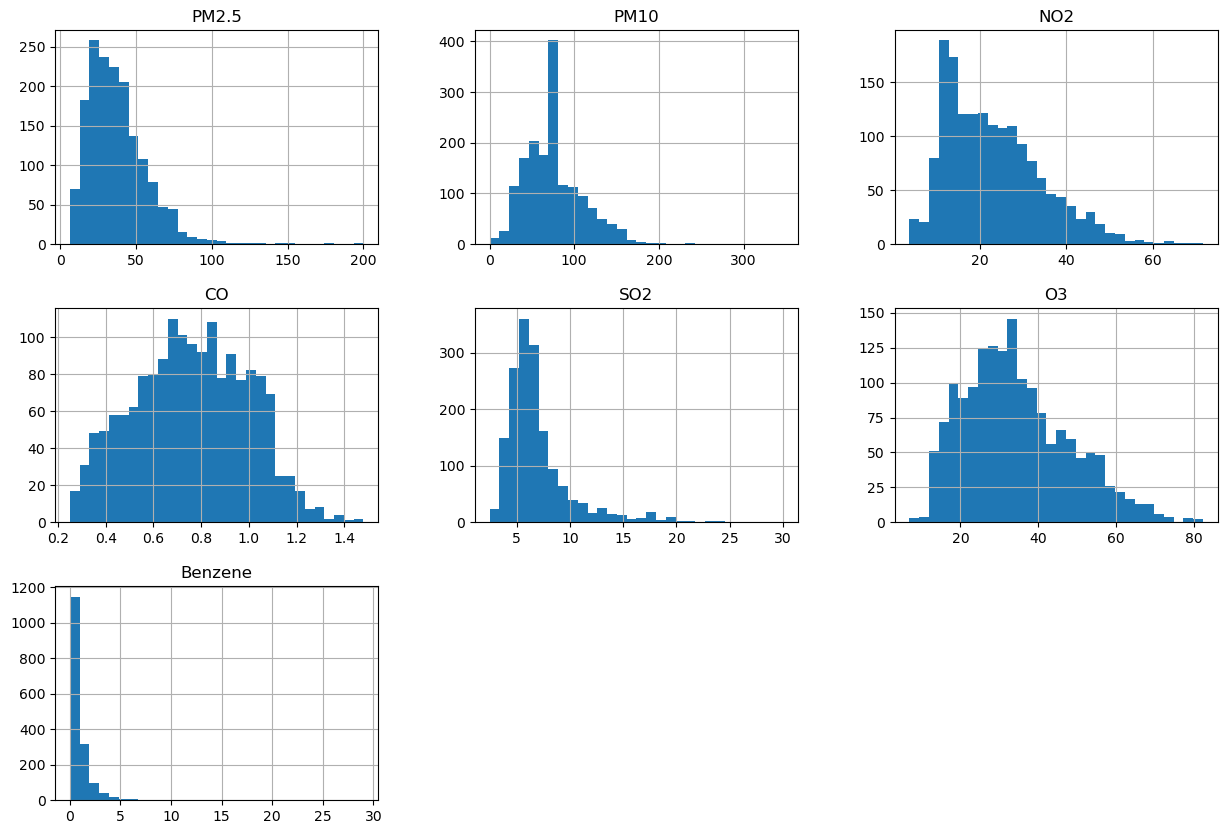

In [20]:
data[[i for i in data.columns if i not in ["Date","AQI"]]].hist(bins=30, figsize=(15, 10))
plt.show()

In [21]:
data_corr = data[[i for i in data.columns if i!="City"]]
corr = data_corr.corr()
corr

,PM2.5,PM10,NO2,CO,SO2,O3,Benzene,AQI
PM2.5,1.000000,0.614331,0.471195,0.320142,0.305400,0.251803,0.165952,0.859119
PM10,0.614331,1.000000,0.563596,0.192466,0.169075,0.243164,0.263136,0.629293
NO2,0.471195,0.563596,1.000000,0.147355,0.028617,0.135596,0.323768,0.437656
CO,0.320142,0.192466,0.147355,1.000000,0.078963,0.419977,-0.062746,0.448831
SO2,0.305400,0.169075,0.028617,0.078963,1.000000,-0.046057,0.124715,0.253975
O3,0.251803,0.243164,0.135596,0.419977,-0.046057,1.000000,-0.012326,0.466434
Benzene,0.165952,0.263136,0.323768,-0.062746,0.124715,-0.012326,1.000000,0.133760
AQI,0.859119,0.629293,0.437656,0.448831,0.253975,0.466434,0.133760,1.000000


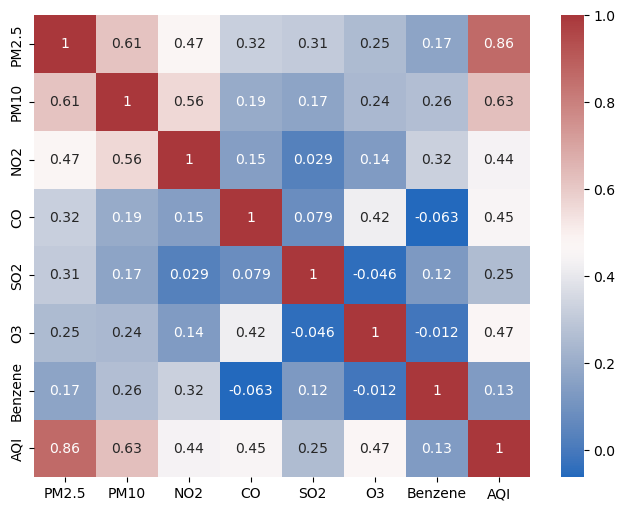

In [22]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="vlag")
plt.show()

In [23]:
data['AQI'] = np.log(data['AQI'])
data

,City,PM2.5,PM10,NO2,CO,SO2,O3,Benzene,AQI
0,Bengaluru,61.55,107.76,38.19,0.98,8.29,56.91,0.33,4.852030
1,Bengaluru,47.27,92.47,39.73,1.06,10.22,51.25,0.32,4.634729
2,Bengaluru,48.86,96.42,46.55,1.01,8.15,46.40,0.40,4.615121
3,Bengaluru,51.35,105.52,45.87,1.09,5.76,41.42,0.53,4.663439
4,Bengaluru,46.57,99.10,41.74,1.03,6.13,50.61,0.39,4.644391
...,...,...,...,...,...,...,...,...,...
1639,Hyderabad,23.29,44.20,22.64,0.36,5.39,24.22,0.88,4.060443
1640,Hyderabad,15.80,32.18,22.73,0.36,6.36,22.25,0.82,3.891820
1641,Hyderabad,20.24,44.74,27.59,0.38,6.29,19.98,1.31,3.850148
1642,Hyderabad,19.38,41.95,24.58,0.39,5.30,17.40,1.45,3.828641


In [24]:
x=data[["PM2.5","PM10","NO2","CO","SO2","O3","Benzene"]]
y=data["AQI"]

In [25]:
print(x)

      PM2.5    PM10    NO2    CO    SO2     O3  Benzene
0     61.55  107.76  38.19  0.98   8.29  56.91     0.33
1     47.27   92.47  39.73  1.06  10.22  51.25     0.32
2     48.86   96.42  46.55  1.01   8.15  46.40     0.40
3     51.35  105.52  45.87  1.09   5.76  41.42     0.53
4     46.57   99.10  41.74  1.03   6.13  50.61     0.39
...     ...     ...    ...   ...    ...    ...      ...
1639  23.29   44.20  22.64  0.36   5.39  24.22     0.88
1640  15.80   32.18  22.73  0.36   6.36  22.25     0.82
1641  20.24   44.74  27.59  0.38   6.29  19.98     1.31
1642  19.38   41.95  24.58  0.39   5.30  17.40     1.45
1643  26.83   66.50  27.18  0.43   6.07  13.20     1.31

[1644 rows x 7 columns]


In [26]:
print(y)

0       4.852030
1       4.634729
2       4.615121
3       4.663439
4       4.644391
          ...   
1639    4.060443
1640    3.891820
1641    3.850148
1642    3.828641
1643    3.871201
Name: AQI, Length: 1644, dtype: float64


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [29]:
coefficient= print(ml.coef_)

[0.00965682 0.00136803 0.00290471 0.26916712 0.00209448 0.00705629
 0.00075724]


In [30]:
intercept = print(ml.intercept_)

3.4466670235367456


In [31]:
predicted= ml.predict(x_train)

In [32]:
print(x_train)

      PM2.5        PM10    NO2    CO   SO2     O3  Benzene
114   57.96  109.490000  36.31  1.19  5.35  54.27     0.84
1258   8.70   31.330000  15.47  0.32  5.25  34.80     0.18
58    50.80  111.320000  38.76  0.94  4.87  56.36     3.14
1137  58.64  119.010000  35.55  0.57  7.38  32.49     1.76
1565  38.07   78.800000  19.72  0.38  4.27  33.80     1.34
...     ...         ...    ...   ...   ...    ...      ...
763   42.23   33.320000  33.02  0.78  6.20  67.28     0.27
835   20.33   42.850000  14.28  0.68  5.98  42.02     0.01
1216  36.43  111.660000  24.25  0.56  5.57  40.78     0.92
559   65.08   76.134607  12.88  0.89  9.37  44.27     0.16
684   41.39   76.134607  13.98  1.24  4.42  39.97     0.07

[1150 rows x 7 columns]


In [33]:
predicted= ml.predict(x_test)

In [34]:
print(x_test)

      PM2.5        PM10    NO2    CO    SO2     O3  Benzene
1573  25.12   46.300000  26.18  0.39   4.56  23.58     0.94
1249  27.67   71.140000  19.27  0.44   4.86  39.38     0.55
1226  48.29  136.640000  27.81  0.72   9.88  47.78     3.01
1566  33.99   68.750000  18.30  0.41   4.36  34.56     1.08
657   24.99   76.134607   8.88  1.06   6.58  16.87     0.16
...     ...         ...    ...   ...    ...    ...      ...
831   21.20   55.080000  12.98  0.76   5.86  47.37     0.00
482   19.25   50.330000  11.69  0.76   5.55  33.06     0.19
1559  19.94   43.450000  20.46  0.41  11.06  36.03     0.94
1354  28.23   63.700000  15.93  0.38  10.36  17.92     0.30
808   26.98   45.520000  12.00  0.99   6.94  57.81     0.00

[494 rows x 7 columns]


In [35]:
predicted.shape

(494,)

In [36]:
df=pd.DataFrame({'actual AQI': y_test, 'predicted AQI': predicted})

In [37]:
print(df)

      actual AQI  predicted AQI
1573    3.912023       4.110256
1249    4.510860       4.274072
1226    4.795791       4.734625
1566    4.304065       4.286284
657     4.394449       4.236199
...          ...            ...
831     4.465908       4.315543
482     4.077537       4.184986
1559    4.025352       4.146568
1354    4.174387       4.103353
808     4.653960       4.493272

[494 rows x 2 columns]


In [38]:
df.head(20)

,actual AQI,predicted AQI
1573,3.912023,4.110256
1249,4.510860,4.274072
1226,4.795791,4.734625
1566,4.304065,4.286284
657,4.394449,4.236199
1228,4.691348,4.623211
511,4.189655,4.270430
1562,4.007333,4.096885
1332,3.931826,3.951484
722,4.615121,4.456985


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score,mean_squared_error,r2_score

In [40]:
confidence= ml.score(x_test,y_test)
print("confidence:", confidence)

confidence: 0.806713242610879


In [41]:
confidence=ml.score(x_train,y_train)
print("confidence:",confidence)

confidence: 0.8305246657669956


In [42]:
pred=ml.predict(x_test)
print('train r2: {}'.format(
    r2_score((y_test), (pred))))
print()

train r2: 0.806713242610879



In [43]:
pred=ml.predict(x_train)
print('train r2: {}'.format(
    r2_score((y_train), (pred))))
print()

train r2: 0.8305246657669956



In [44]:
import math

In [45]:
print('mean absolute error:', metrics.mean_absolute_error(y_test, predicted))

mean absolute error: 0.11430537198253916


In [46]:
print('mean squared error:', metrics.mean_squared_error(y_test, predicted))

mean squared error: 0.023917527055735483


In [47]:
print('root mean squared error:', math.sqrt(metrics.mean_squared_error(y_test, predicted)))

root mean squared error: 0.15465292449784285


In [48]:
graph=df.head(20)

<Axes: >

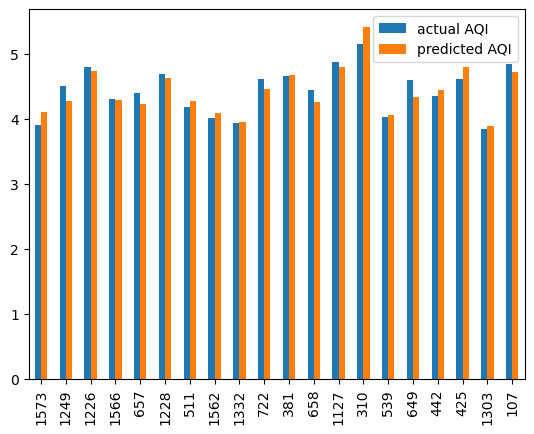

In [49]:
graph.plot(kind='bar')